In [60]:
#Dependencies and Set up 
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from pathlib import path 
import requests
from pprint import pprint



In [36]:
#File Path and read filepath and store into pandas DataFrames

Filepath = os.path.join("Resources","us_counties_covid19_daily.csv")

C19_df = pd.read_csv(Filepath, encoding="ISO-8859-1")



In [37]:
# Show the first five rows.
C19_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [63]:
# Select rows in my date range
# Make a start date
Beg_date = '2020-06-01'

# Make an end date
end_date = '2020-08-31'

# Select DataFrame rows between two dates
mask = (C19_df['date'] > Beg_date) & (C19_df['date'] <= end_date)
SummerC19_df = C19_df.loc[mask]

SummerC19_df.head()

,date,county,state,fips,cases,deaths
199923,2020-06-02,Autauga,Alabama,1001.0,240,5.0
199924,2020-06-02,Baldwin,Alabama,1003.0,308,9.0
199925,2020-06-02,Barbour,Alabama,1005.0,176,1.0
199926,2020-06-02,Bibb,Alabama,1007.0,79,1.0
199927,2020-06-02,Blount,Alabama,1009.0,65,1.0


In [65]:
# Sort by date and reset index
SummerC19_df= SummerC19_df.sort_values('date')
SummerC19_df = SummerC19_df.reset_index(drop=True)

SummerC19_df.head()


,date,county,state,fips,cases,deaths
0,2020-06-02,Autauga,Alabama,1001.0,240,5.0
1,2020-06-02,St. Charles,Missouri,29183.0,799,61.0
2,2020-06-02,Baldwin,Alabama,1003.0,308,9.0
3,2020-06-02,Barbour,Alabama,1005.0,176,1.0
4,2020-06-02,Bibb,Alabama,1007.0,79,1.0


In [44]:
# Organize the data by grouping by state and calculating the total cases
state_cases_df = SummerC19_df.groupby(['state']).agg({'cases': 'sum'})

state_cases_df.head()

,cases
state,
Alabama,6055947
Alaska,245031
Arizona,11333730
Arkansas,3001067
California,35363147


In [46]:
# Organize the data by grouping by state and calculating the total cases
county_cases_df = SummerC19_df.groupby(['county']).agg({'cases': 'sum'})

county_cases_df.head()

,cases
county,
Abbeville,19184
Acadia,149844
Accomack,96320
Ada,494759
Adair,49039


In [59]:
# Calculate the mean, median, mode, and standard deviation of total cases by county
mean_cases = county_cases_df['cases'].mean()
median_cases = county_cases_df['cases'].median()
mode_cases = county_cases_df['cases'].mode()[0]
std_cases = county_cases_df['cases'].std()

print(f"Mean cases: {mean_cases:.2f}")
print(f"Median cases: {median_cases:.2f}")
print(f"Mode cases: {mode_cases:.2f}")
print(f"Standard deviation of cases: {std_cases:.2f}")



Mean cases: 177955.39
Median cases: 20810.00
Mode cases: 115.00
Standard deviation of cases: 770015.15


Text(0.5, 1.0, 'Percentage of Total COVID-19 Cases by County in Summer 2020')

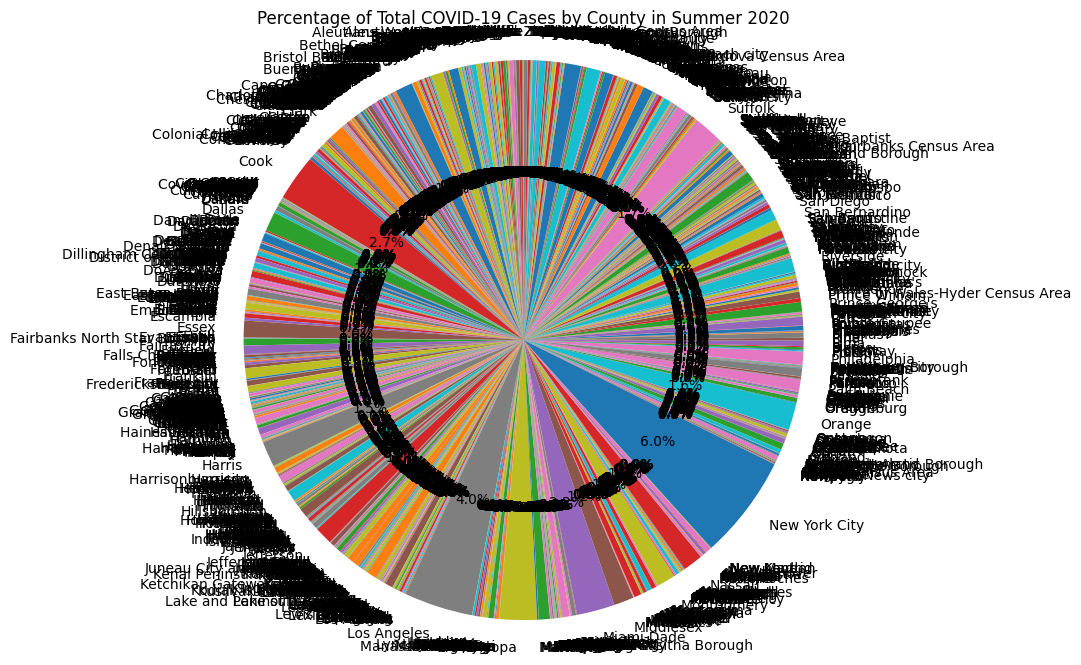

In [62]:
# Create a pie chart of the total cases by county
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(county_cases_df['cases'], labels=county_cases_df.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Percentage of Total COVID-19 Cases by County in Summer 2020')
